In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/data.txt')
df.head()

,Size,Price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


<Axes: xlabel='Size', ylabel='Price'>

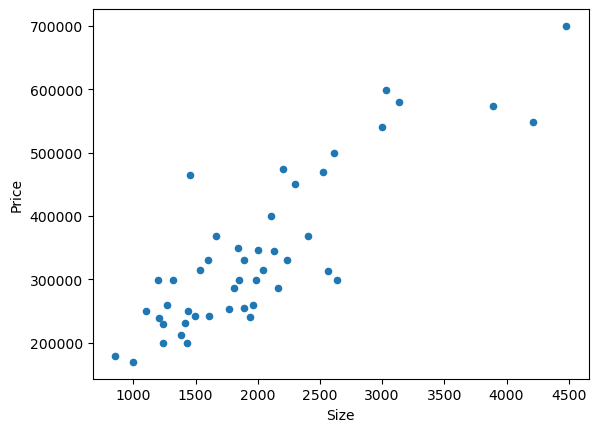

In [3]:
df.plot(x='Size', y='Price', kind='scatter')

In [4]:
df['Size_normal'] = (df['Size'] - df['Size'].mean()) / df['Size'].std()
df['Price_normal'] = (df['Price'] - df['Price'].mean()) / df['Price'].std()

<Axes: xlabel='Size_normal', ylabel='Price_normal'>

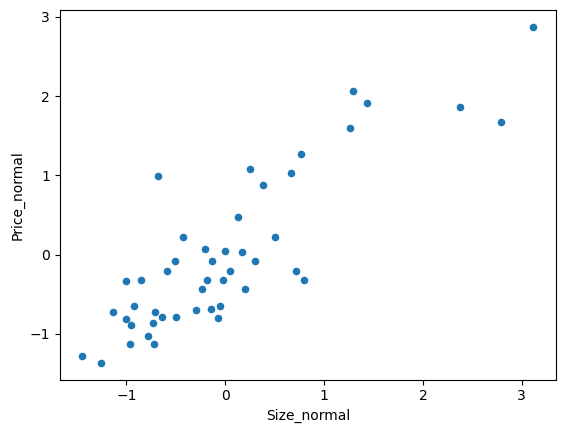

In [5]:
df.plot(x='Size_normal', y='Price_normal', kind='scatter')

In [6]:
X = df["Size_normal"]
y = df["Price_normal"]

In [7]:
def total(yp, y):
    comp = np.square(yp - y)
    return comp.sum()

In [8]:
def gradient(yp, y, X, size):
    w_g, b_g = 0, 0
    w_g = (np.dot((yp - y), X)).sum()
    b_g = (yp - y).sum()

    w_fin = (1/size) * w_g
    b_fin = (1/size) * b_g
    
    return w_fin, b_fin

In [9]:
def linear_regression(X, y):
    w, b = np.float64(0.0), np.float64(0.0)
    for iteration in range(max_iterations):
        f_pred = w * X + b
        J = (1/2*m) * total(f_pred, y)

        w_gradient, b_gradient = gradient(f_pred, y, X, m)
    
        w = w - a * w_gradient
        b = b - a * b_gradient
        
    return w, b

In [10]:
m = X.size
max_iterations = 150
a = 0.02
w, b = linear_regression(X, y)
w, b

(np.float64(0.8109167167419286), np.float64(-1.0124289113922171e-16))

In [11]:
y_predict = df['Size_normal'] * w + b
df['Prediction_normal'] = y_predict

y_predict = y_predict * df['Price'].std() + df['Price'].mean()
df['Prediction'] = y_predict.astype(np.int64)

In [12]:
df.head(10)

,Size,Price,Size_normal,Price_normal,Prediction_normal,Prediction
0,2104,399900,0.130010,0.475747,0.105427,353595
1,1600,329900,-0.504190,-0.084074,-0.408856,289289
2,2400,369000,0.502476,0.228626,0.407466,391362
3,1416,232000,-0.735723,-0.867025,-0.596610,265812
4,3000,539900,1.257476,1.595389,1.019708,467916
5,1985,299900,-0.019732,-0.323998,-0.016001,338411
6,1534,314900,-0.587240,-0.204036,-0.476203,280868
7,1427,198999,-0.721881,-1.130948,-0.585386,267216
8,1380,212000,-0.781023,-1.026973,-0.633345,261219
9,1494,242500,-0.637573,-0.783051,-0.517019,275764


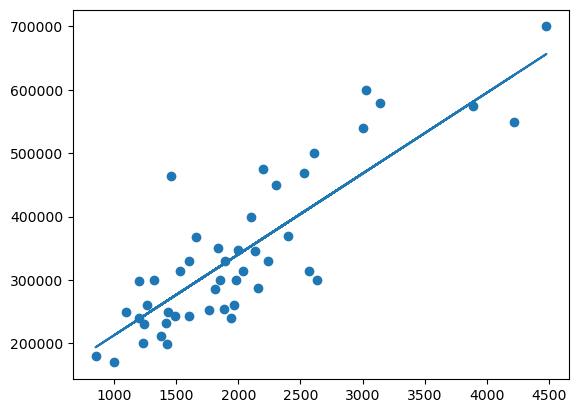

In [13]:
plt.figure()
plt.scatter(df["Size"], df["Price"]);
plt.plot(df["Size"],df['Prediction']);